<a href="https://colab.research.google.com/github/dilp90/PDI/blob/main/DominioDeLaFrecuencia/TransformadaFourier_FiltroPasaBajas_y_PasaAlta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Transformada de Fourier**
Ejemplo de implementación de filtro pasa-bajas y filtro pasa-alta.

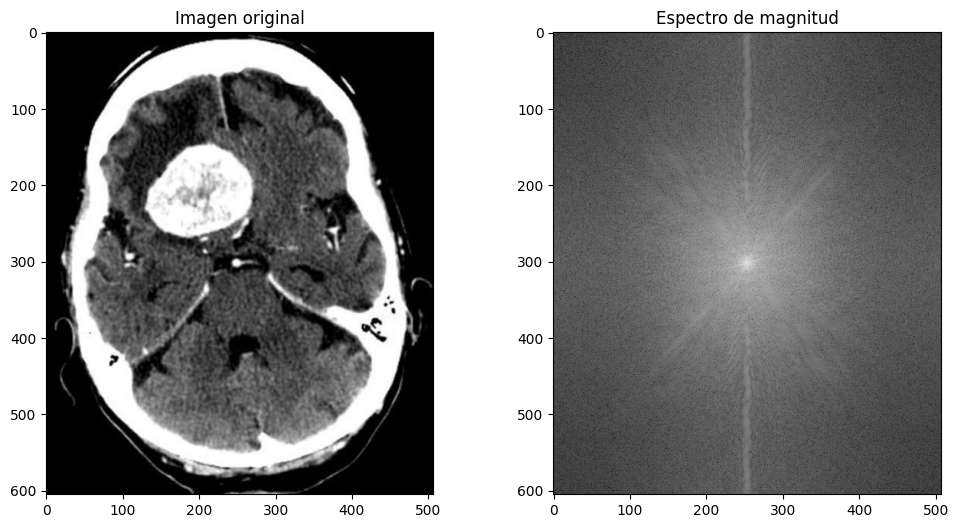

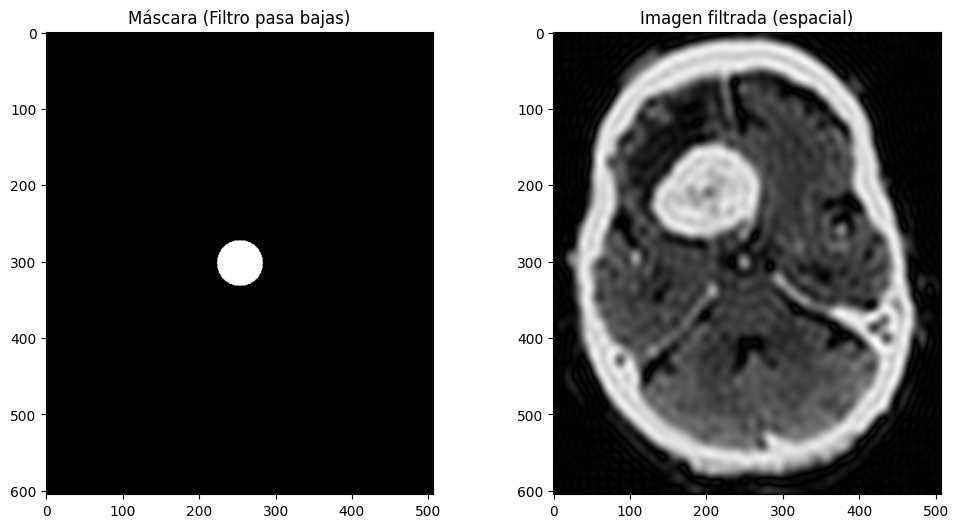

In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Cargar imagen en escala de grises
img = cv2.imread('/content/Te-me_0015.jpg', cv2.IMREAD_GRAYSCALE)

# Obtener la transformada de Fourier (compleja)
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)  # Centrar baja frecuencia

# Calcular y mostrar espectro de magnitud
magnitude_spectrum = 20 * np.log(np.abs(fshift) + 1)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Imagen original')

plt.subplot(1, 2, 2)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Espectro de magnitud')
plt.show()

# Crear un filtro pasa bajas (eliminar altas frecuencias)
rows, cols = img.shape
crow, ccol = rows // 2 , cols // 2
r = 30  # Radio del filtro pasa bajas

# Crear máscara circular
mask = np.zeros((rows, cols), np.uint8)
cv2.circle(mask, (ccol, crow), r, 1, thickness=-1)

# Aplicar la máscara al espectro
fshift_filtered = fshift * mask

# Transformada inversa
f_ishift = np.fft.ifftshift(fshift_filtered)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

# Mostrar imagen reconstruida
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(mask, cmap='gray')
plt.title('Máscara (Filtro pasa bajas)')

plt.subplot(1, 2, 2)
plt.imshow(img_back, cmap='gray')
plt.title('Imagen filtrada (espacial)')
plt.show()


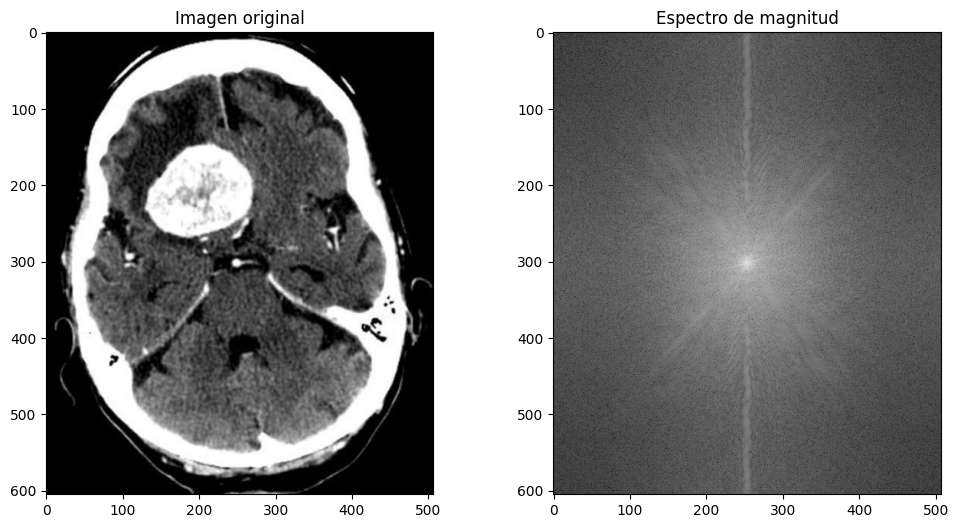

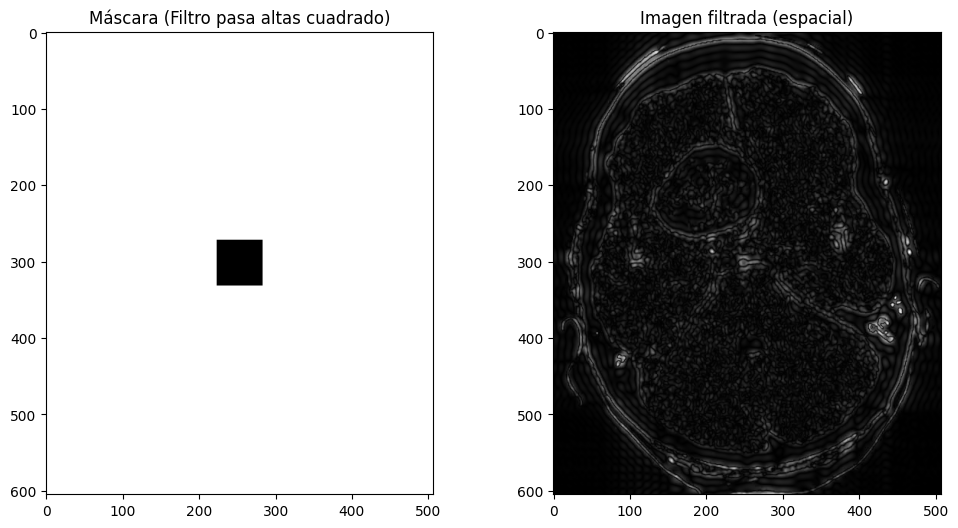

In [ ]:
# Cargar imagen en escala de grises
img = cv2.imread('/content/Te-me_0015.jpg', cv2.IMREAD_GRAYSCALE)

if img is None:
    raise ValueError("No se pudo cargar la imagen. Asegúrate de que el archivo exista.")

# Transformada de Fourier y centrado
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)

# Magnitud del espectro
magnitude_spectrum = 20 * np.log(np.abs(fshift) + 1)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Imagen original')

plt.subplot(1, 2, 2)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Espectro de magnitud')
plt.show()

# Filtro pasa altas: máscara cuadrada en el centro
rows, cols = img.shape
crow, ccol = rows // 2 , cols // 2
size = 60  # Tamaño del cuadrado a eliminar (bajas frecuencias)

# Crear máscara con unos, luego poner a cero la región central
mask = np.ones((rows, cols), np.uint8)
mask[crow - size//2 : crow + size//2, ccol - size//2 : ccol + size//2] = 0

# Aplicar la máscara
fshift_filtered = fshift * mask

# Transformada inversa
f_ishift = np.fft.ifftshift(fshift_filtered)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

# Mostrar resultados
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(mask, cmap='gray')
plt.title('Máscara (Filtro pasa altas cuadrado)')

plt.subplot(1, 2, 2)
plt.imshow(img_back, cmap='gray')
plt.title('Imagen filtrada (espacial)')
plt.show()
